In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Carregamento de modelos e predições.

In [ ]:
import pickle
# load the model from disk
path_model = '/content/gdrive/MyDrive/INF 0619-010 - Trabalho Final - Zanoni/Modelos'
#path_model = '/content/gdrive/MyDrive/619_Projeto Final'
modelRF = pickle.load(open(os.path.join(path_model, 'model_RandomForest.sav'), 'rb'))
modelXGB = pickle.load(open(os.path.join(path_model, 'model_XGBoost.sav'), 'rb'))

In [ ]:
#Arquivos csv de predições
path_end = '/content/gdrive/MyDrive/TrabalhoFinal_CleanDataset/enderecos'
#path_end = '/content/gdrive/MyDrive/619_Projeto Final'
df_pred_train = pd.read_csv(os.path.join(path_end, 'predicoes_treino0.csv'))
df_pred_val = pd.read_csv(os.path.join(path_end, 'predicoes_validacao0.csv'))
df_pred_test = pd.read_csv(os.path.join(path_end, 'predicoes_teste0.csv'))

In [ ]:
import tensorflow as tf
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

path_model = '/content/gdrive/MyDrive/INF 0619-010 - Trabalho Final - Zanoni/Modelos'
model1 = tf.keras.models.load_model(os.path.join(path_model, 'modelB_sa.h5'))
model2 = tf.keras.models.load_model(os.path.join(path_model, 'model_InceptionV3_Clean.h5'))

In [ ]:
#Imagens
src_path1 = '/content/gdrive/MyDrive/TrabalhoFinal_CleanDataset'
train_path = os.path.join(src_path1, 'train_v2')
train_path_emp = os.path.join(train_path, 'empresas')
train_path_Nemp = os.path.join(train_path, 'nao_empresas')

#src_path = '/content/gdrive/MyDrive/619_ProjetoFinal/Dados_ProjetoFinal/split_train_val_test'
src_path = '/content/gdrive/MyDrive/Dados_ProjetoFinal_MDC010-INF019/split_train_val_test'
val_path = os.path.join(src_path, 'val')
test_path = os.path.join(src_path, 'test')

val_path_emp = os.path.join(val_path, 'imagens_empresas')
val_path_Nemp = os.path.join(val_path, 'imagens_nao_empresas')

test_path_emp = os.path.join(test_path, 'imagens_empresas')
test_path_Nemp = os.path.join(test_path, 'imagens_nao_empresas')

### Dados para CNNs de imagens.

In [ ]:
datagen1 = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
train_generator1 = datagen1.flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=1, class_mode='categorical', shuffle=True)
batch_X_proc1, batch_Y_proc1 = train_generator1.next()
validation_generator1 = datagen1.flow_from_directory(directory=val_path, target_size=(224, 224), batch_size=1, class_mode='categorical', shuffle=False)
batch_val_X_proc1, batch_val_Y_proc1 = validation_generator1.next()
test_generator1 = datagen1.flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=1, class_mode='categorical', shuffle=False)
batch_test_X_proc1, batch_test_Y_proc1 = test_generator1.next()

Found 6538 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.
Found 2202 images belonging to 2 classes.


In [ ]:
datagen2 = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)
train_generator2 = datagen2.flow_from_directory(directory=train_path, target_size=(299, 299), batch_size=1, class_mode='categorical', shuffle=True)
batch_X_proc2, batch_Y_proc2 = train_generator2.next()
validation_generator2 = datagen2.flow_from_directory(directory=val_path, target_size=(299, 299), batch_size=1, class_mode='categorical', shuffle=False)
batch_val_X_proc2, batch_val_Y_proc2 = validation_generator2.next()
test_generator2 = datagen2.flow_from_directory(directory=test_path, target_size=(299, 299), batch_size=1, class_mode='categorical', shuffle=False)
batch_test_X_proc2, batch_test_Y_proc2 = test_generator2.next()

Found 6538 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.
Found 2202 images belonging to 2 classes.


### Predições dos modelos CNN.

In [ ]:
y_pred_img1_train = model1.predict(train_generator1)    

In [ ]:
df_pred_train['pred1_cEmp'] = y_pred_img1_train[:,0]
df_pred_train['pred1_cNEmp'] = y_pred_img1_train[:,1]
df_pred_train.head()

,Unnamed: 0,y,predRF_cEmp,predRF_cNEmp,predXGB_cEmp,predXGB_cNEmp,pred1_cEmp,pred1_cNEmp
0,1000,EMPRESA,0.362408,0.637592,0.132949,0.867051,0.999382,0.000618
1,1001,EMPRESA,0.995000,0.005000,0.998738,0.001262,0.999419,0.000581
2,1002,EMPRESA,1.000000,0.000000,0.999138,0.000862,0.179388,0.820612
3,1013,EMPRESA,1.000000,0.000000,0.999046,0.000954,0.652339,0.347661
4,1014,EMPRESA,1.000000,0.000000,0.997948,0.002052,0.902162,0.097838


In [ ]:
df_pred_train.to_csv(os.path.join(path_end, 'predicoes_treino.csv'))

In [ ]:
y_pred_img1_val = model1.predict(validation_generator1)

In [ ]:
df_pred_val['pred1_cEmp'] = y_pred_img1_val[:,0]
df_pred_val['pred1_cNEmp'] = y_pred_img1_val[:,1]
df_pred_val.head()

,Unnamed: 0,y,predRF_cEmp,predRF_cNEmp,predXGB_cEmp,predXGB_cNEmp,pred1_cEmp,pred1_cNEmp
0,1019,EMPRESA,0.995,0.005,0.998109,0.001891,0.997832,0.002168
1,1020,EMPRESA,1.000,0.000,0.998476,0.001524,0.999842,0.000158
2,1041,EMPRESA,1.000,0.000,0.998961,0.001039,0.966826,0.033174
3,1051,EMPRESA,0.995,0.005,0.973973,0.026027,0.899626,0.100374
4,1055,EMPRESA,0.995,0.005,0.947540,0.052460,0.787171,0.212829


In [ ]:
df_pred_val.to_csv(os.path.join(path_end, 'predicoes_validacao.csv'))

In [ ]:
y_pred_img2_train = model2.predict(train_generator2)

In [ ]:
df_pred_train['pred2_cEmp'] = y_pred_img2_train[:,0]
df_pred_train['pred2_cNEmp'] = y_pred_img2_train[:,1]
df_pred_train.head()

,Unnamed: 0,y,predRF_cEmp,predRF_cNEmp,predXGB_cEmp,predXGB_cNEmp,pred1_cEmp,pred1_cNEmp,pred2_cEmp,pred2_cNEmp
0,1000,EMPRESA,0.362408,0.637592,0.132949,0.867051,0.999382,0.000618,0.797445,0.202555
1,1001,EMPRESA,0.995000,0.005000,0.998738,0.001262,0.999419,0.000581,0.043886,0.956114
2,1002,EMPRESA,1.000000,0.000000,0.999138,0.000862,0.179388,0.820612,0.806722,0.193278
3,1013,EMPRESA,1.000000,0.000000,0.999046,0.000954,0.652339,0.347661,0.958931,0.041069
4,1014,EMPRESA,1.000000,0.000000,0.997948,0.002052,0.902162,0.097838,0.109377,0.890624


In [ ]:
df_pred_train.to_csv(os.path.join(path_end, 'predicoes_treino.csv'))

In [ ]:
y_pred_img2_val = model2.predict(validation_generator2)    

In [ ]:
df_pred_val['pred2_cEmp'] = y_pred_img2_val[:,0]
df_pred_val['pred2_cNEmp'] = y_pred_img2_val[:,1]
df_pred_val.head()

,Unnamed: 0,y,predRF_cEmp,predRF_cNEmp,predXGB_cEmp,predXGB_cNEmp,pred1_cEmp,pred1_cNEmp,pred2_cEmp,pred2_cNEmp
0,1019,EMPRESA,0.995,0.005,0.998109,0.001891,0.997832,0.002168,0.960258,0.039742
1,1020,EMPRESA,1.000,0.000,0.998476,0.001524,0.999842,0.000158,0.985648,0.014352
2,1041,EMPRESA,1.000,0.000,0.998961,0.001039,0.966826,0.033174,0.976137,0.023863
3,1051,EMPRESA,0.995,0.005,0.973973,0.026027,0.899626,0.100374,0.710421,0.289579
4,1055,EMPRESA,0.995,0.005,0.947540,0.052460,0.787171,0.212829,0.598521,0.401479


In [ ]:
df_pred_val.to_csv(os.path.join(path_end, 'predicoes_validacao.csv'))

In [ ]:
y_pred_img1_test = model1.predict(test_generator1)    

In [ ]:
df_pred_test['pred1_cEmp'] = y_pred_img1_test[:,0]
df_pred_test['pred1_cNEmp'] = y_pred_img1_test[:,1]
df_pred_test.head()

,Unnamed: 0,y,predRF_cEmp,predRF_cNEmp,predXGB_cEmp,predXGB_cNEmp,pred1_cEmp,pred1_cNEmp
0,1003,EMPRESA,1.0,0.0,0.999259,0.000741,0.999796,0.000204
1,1012,EMPRESA,1.0,0.0,0.999644,0.000356,0.999934,0.000066
2,1022,EMPRESA,1.0,0.0,0.999001,0.000999,0.999213,0.000787
3,1028,EMPRESA,1.0,0.0,0.995357,0.004643,0.994152,0.005848
4,1040,EMPRESA,1.0,0.0,0.998386,0.001614,0.282040,0.717960


In [ ]:
df_pred_test.to_csv(os.path.join(path_end, 'predicoes_teste.csv'))

In [ ]:
y_pred_img2_test = model2.predict(test_generator2)    

In [ ]:
df_pred_test['pred2_cEmp'] = y_pred_img2_test[:,0]
df_pred_test['pred2_cNEmp'] = y_pred_img2_test[:,1]
df_pred_test.head()

,Unnamed: 0,y,predRF_cEmp,predRF_cNEmp,predXGB_cEmp,predXGB_cNEmp,pred1_cEmp,pred1_cNEmp,pred2_cEmp,pred2_cNEmp
0,1003,EMPRESA,1.0,0.0,0.999259,0.000741,0.999796,0.000204,0.998279,0.001721
1,1012,EMPRESA,1.0,0.0,0.999644,0.000356,0.999934,0.000066,0.987559,0.012441
2,1022,EMPRESA,1.0,0.0,0.999001,0.000999,0.999213,0.000787,0.999390,0.000610
3,1028,EMPRESA,1.0,0.0,0.995357,0.004643,0.994152,0.005848,0.985960,0.014040
4,1040,EMPRESA,1.0,0.0,0.998386,0.001614,0.282040,0.717960,0.325906,0.674094


In [ ]:
df_pred_test.to_csv(os.path.join(path_end, 'predicoes_teste.csv'))

## Média das probabilidades dos modelos.

In [ ]:
df_pred_val['mediaEmp'] = df_pred_val[['predRF_cEmp','predXGB_cEmp', 'pred1_cEmp','pred2_cEmp']].mean(axis=1)
df_pred_val['mediaNEmp'] = df_pred_val[['predRF_cNEmp','predXGB_cNEmp', 'pred1_cNEmp','pred2_cNEmp']].mean(axis=1)
df_pred_val.head()

,Unnamed: 0,y,predRF_cEmp,predRF_cNEmp,predXGB_cEmp,predXGB_cNEmp,pred1_cEmp,pred1_cNEmp,pred2_cEmp,pred2_cNEmp,mediaEmp,mediaNEmp
0,1019,EMPRESA,0.995,0.005,0.998109,0.001891,0.997832,0.002168,0.960258,0.039742,0.987800,0.012200
1,1020,EMPRESA,1.000,0.000,0.998476,0.001524,0.999842,0.000158,0.985648,0.014352,0.995992,0.004008
2,1041,EMPRESA,1.000,0.000,0.998961,0.001039,0.966826,0.033174,0.976137,0.023863,0.985481,0.014519
3,1051,EMPRESA,0.995,0.005,0.973973,0.026027,0.899626,0.100374,0.710421,0.289579,0.894755,0.105245
4,1055,EMPRESA,0.995,0.005,0.947540,0.052460,0.787171,0.212829,0.598521,0.401479,0.832058,0.167942


In [ ]:
y_pred_int = (df_pred_val['mediaNEmp'] > 0.5).astype(np.int32) 
y_val_int = (df_pred_val['y'] == 'N_EMPRESA').astype(np.int32)  

### Matriz de Confusão.

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4,suppress=True)

# Matriz de confusão
cm = confusion_matrix(y_val_int, y_pred_int)



Acurácia balanceada: 0.9296


Matriz de confusão balanceada


Text(0.5, 57.5, 'Predicted label')

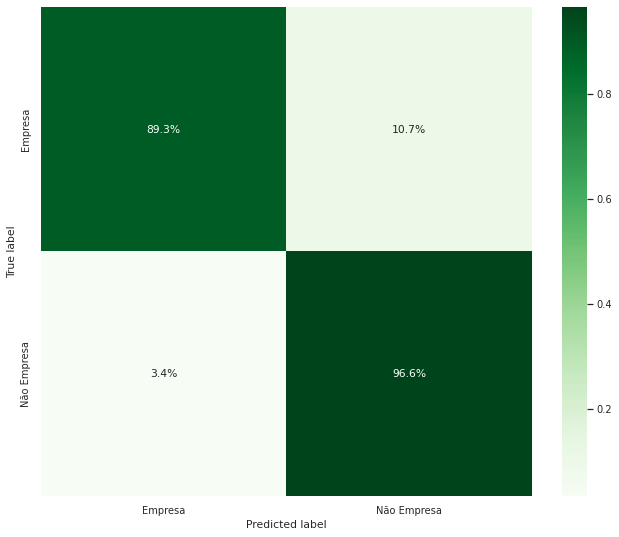

In [ ]:
# Matriz de confusão normalizada
num_classes=2
categories = ['Empresa', 'Não Empresa']
cmn = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cmn) / num_classes
print("\n\nAcurácia balanceada:", round(balanced_acc,4))

print("\n\nMatriz de confusão balanceada")
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cmn, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap='Greens')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Curva ROC.

In [ ]:
#AUC-ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_val_int, df_pred_val['mediaNEmp'], pos_label=1)

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val_int, df_pred_val['mediaNEmp'])
print(auc_score)

0.979599819005913


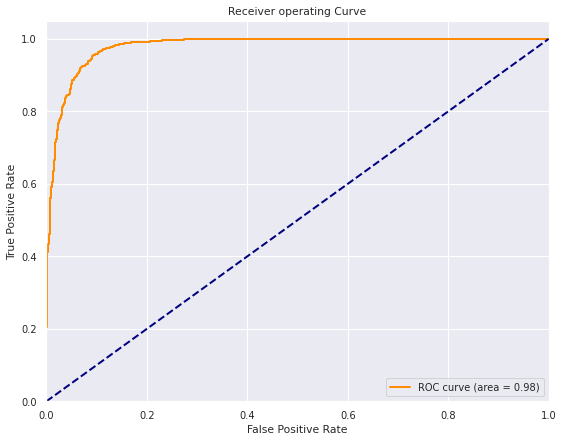

In [ ]:
plt.figure(figsize = (9,7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc_score,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Curve")
plt.legend(loc="lower right")
plt.show()

## Predições como entrada de um modelo Random Forest.

In [ ]:
l_features=['predRF_cEmp', 'predRF_cNEmp', 'predXGB_cEmp', 'predXGB_cNEmp', 'pred1_cEmp', 'pred1_cNEmp', 'pred2_cEmp', 'pred2_cNEmp']

In [ ]:
X = df_pred_train[l_features]
X_val = df_pred_val[l_features]

y = df_pred_train['y']
y_val = df_pred_val['y']

In [ ]:
# random forest balanceado
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_validate
from numpy import mean

modelC = BalancedRandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
parametros = { 
    'n_estimators': [10, 100, 200, 500],
    'max_depth' : [8, 16, 32],
}
model_gridC = GridSearchCV(estimator=modelC, param_grid=parametros, cv= 5)

In [ ]:
model_gridC.fit(X, y)
model_gridC.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [ ]:
modelRFC=BalancedRandomForestClassifier(random_state=42, n_estimators= 200, max_depth=8)

In [ ]:
classifierRFC = modelRFC.fit(X, y)

In [ ]:
import pickle
filename = os.path.join(path_model, 'model_RandomForest_Comb.sav')
pickle.dump(modelRFC, open(filename, 'wb'))

### Matriz de Confusão.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score

# Avaliando conjunto de validação
y_val_predRFC = modelRFC.predict(X_val)
# Acurácia balanceada & Matriz de confusão relativa
balanced_accuracy_score_val = balanced_accuracy_score(y_val, y_val_predRFC)
cm = confusion_matrix(y_true=y_val, y_pred=y_val_predRFC, normalize='true') # a matriz de confusão é normalizada sobre as condições verdadeiras (linhas)



Acurácia balanceada: 0.8777


Matriz de confusão balanceada


Text(0.5, 57.5, 'Predicted label')

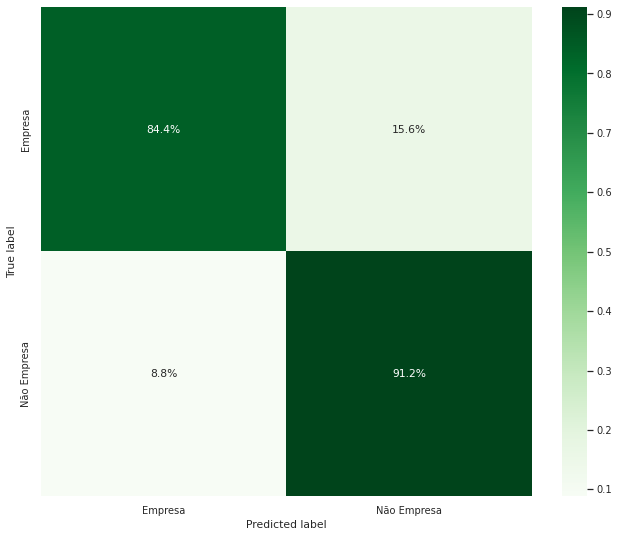

In [ ]:
# Matriz de confusão normalizada
num_classes=2
categories = ['Empresa', 'Não Empresa']
cmn = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cmn) / num_classes
print("\n\nAcurácia balanceada:", round(balanced_acc,4))

print("\n\nMatriz de confusão balanceada")
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cmn, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap='Greens')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Curva ROC.

In [ ]:
predictionsRFC_val = classifierRFC.predict_proba(X_val)

In [ ]:
#AUC-ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_val_int, predictionsRFC_val[:,1], pos_label=1)

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val_int, predictionsRFC_val[:,1])
print(auc_score)

0.9339039248618898


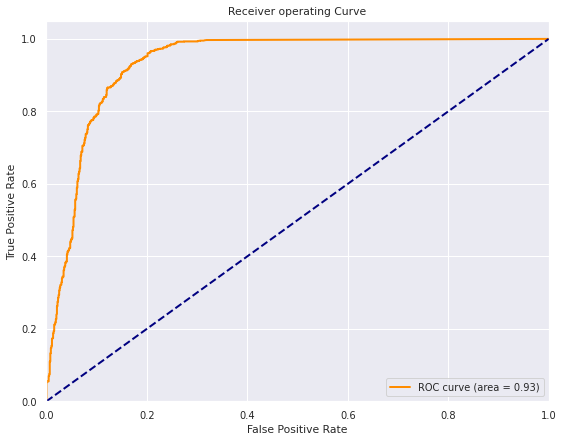

In [ ]:
plt.figure(figsize = (9,7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc_score,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(modelRFC, X, y, n_repeats=10, random_state=42, n_jobs=-1)

In [ ]:
forest_importances = pd.Series(result.importances_mean, index=l_features).sort_values(ascending=False)

In [ ]:
forest_importances[0:20]

predRF_cNEmp     0.407663
predRF_cEmp      0.385087
predXGB_cEmp     0.012083
predXGB_cNEmp    0.010447
pred1_cEmp       0.002784
pred1_cNEmp      0.002615
pred2_cNEmp      0.002141
pred2_cEmp       0.001728
dtype: float64

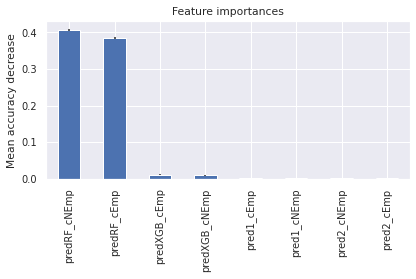

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Predições como entrada de um modelo XGBoost.

In [ ]:
from xgboost import XGBClassifier
# fit model no training data
modelXGB = XGBClassifier()
classifierXGB = modelXGB.fit(X, y)

In [ ]:
import pickle
filename = os.path.join(path_model, 'model_XGBoost_Comb.sav')
pickle.dump(modelXGB, open(filename, 'wb'))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score

# Avaliando conjunto de validação
y_val_pred = modelXGB.predict(X_val)
# Acurácia balanceada & Matriz de confusão relativa
balanced_accuracy_score_val = balanced_accuracy_score(y_val, y_val_pred)
cm = confusion_matrix(y_true=y_val, y_pred=y_val_pred, normalize='true') # a matriz de confusão é normalizada sobre as condições verdadeiras (linhas)

XGBoost | Balanced Acc: 0.8734


Text(0.5, 57.5, 'Predicted label')

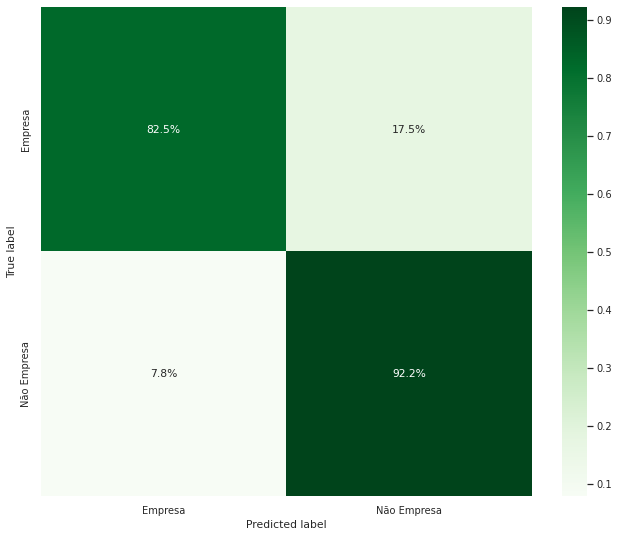

In [ ]:
import seaborn as sns
categories = ['Empresa', 'Não Empresa']
title = f"XGBoost | Balanced Acc: {round(balanced_accuracy_score_val,4)}"
print(title)
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cm, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap='Greens')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
predictionsXGB_val = classifierXGB.predict_proba(X_val)
y_val_int = (y_val == 'N_EMPRESA').astype(np.int32)  

In [ ]:
#AUC-ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_val_int, predictionsXGB_val[:,1], pos_label=1)

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val_int, predictionsXGB_val[:,1])
print(auc_score)

0.9339635745139192


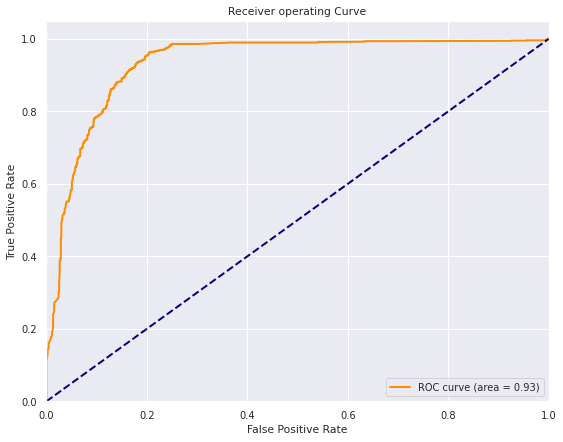

In [ ]:
plt.figure(figsize = (9,7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc_score,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Curve")
plt.legend(loc="lower right")
plt.show()